# Домашнее задание №1

## Задание №1. Попытаться установить Jupyter Notebook с использованием пакетного менеджера pip

На моём пк уже довольно давно установленна последняя версия Jupyter Notebook с использованием пакетного менеджера pip

В моем случае Jupyter Notebook прихел на замену стандартного текстового редактора.
С помощью Jupyter Notebook я делаю для себя конспекты, заметки и примеры кода.

## Задание №2. Настройте рабочее окружение таким образом, чтобы было удобно работать

У меня установленна оперативная система Linux Ubuntu 20.04.
Среды разработки (IDE): PyCharm, Visual Studio. Предпочитаю работать в Visual Studio, в ней очень много дополнений и интуитивно понятна.
Языки программирования: Python 3.8 и Pynhon 3.10

## Задание №3. Перечитать все закрепленные за лекцией материалы

## Тема 1. Windows Subsystem for Linux

Windows Subsystem for Linux, в моём понимании, это костыль для работы на Linux под Windows, все равно, что ездить на мерсе с наклейками от лимузина. Легче установить Linux паралельно Windows и работать на полноценной системе.

## Тема 2. MRO

MRO - method resolution order "порядок разрешения методов" (Смертельный алмаз смерти). Это порядок, в котором метод ищется в иерархии классов, выполняется снизу вверх и слева направо.
Это означает, что сначала метод ищется в классе объекта. Если он не найден, он ищется в непосредственном суперклассе. В случае нескольких суперклассов поиск осуществляется слева направо в том порядке, в котором он был объявлен разработчиком.

Пример 1

In [4]:
class A:
    pass

class B:
    pass

class C(B, A):
    pass


В этом случае MRO будет C -> B -> A.

Пример 2

In [6]:
class A:
  def method(self):
    print("A.method() called")

class B(A):
  def method(self):
    print("B.method() called")

b = B()
b.method()


B.method() called


MRO для этого случая: B -> A

Пример 3

In [21]:
class A:
  def method(self):
    print("A.method() called")

class B:
  pass

class C(B, A):
  pass

c = C()
c.method()


A.method() called


MRO для этого случая: C -> B -> A

Пример 4

In [22]:
class A:
  def method(self):
    print("A.method() called")

class B:
  def method(self):
    print("B.method() called")

class C(A, B):
  pass

class D(C, B):
  pass

d = D()
d.method()


A.method() called


MRO для этого случая: D -> C -> A -> B

Пример 5

https://levelup.gitconnected.com/method-resolution-order-in-python-5afbaecc25e0

In [23]:
class O:
    def method(self):
        print("O.method() called")

class F(O):
    pass

class E(O): 
    pass

class D(O): 
    pass

class C(D,F): 
    pass

class B(D,E): 
    pass

class A(B,C): 
    pass

def myFunc(b):
    for x in range(b):
        n = x+1
        print(n, end=" ")
 
myFunc(6)

a = A()
a.method()


O.method() called


 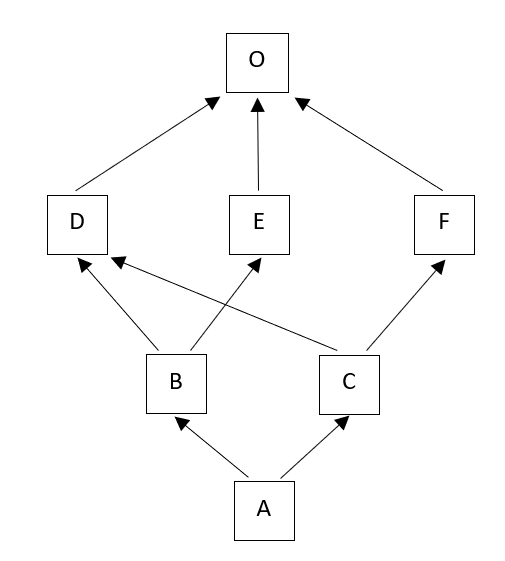

Алгоритм линеаризации C3 – позволяет разрешить возможные конфликтные ситуации при множественном наследовании (конфликт методов, проблема ромба). Основных правила линеаризации:

- Дети должны предшествовать своим родителям.
- Если конкретный класс наследуется от одного или нескольких классов, они сохраняются в порядке, указанном в кортеже базового класса.


MRO для этого случая: A -> B -> C -> D -> E -> F -> O

Вывод: исходя из своего небольшого опыта, влагодаря MRO в Django можно выстроить нужный тебе View. Правда там лабиринт еще тот :)

## Тема 3. VSCode

Visual Studio Code интегрированная среда разработки (IDE) — это многофункциональная программа, которая поддерживает многие аспекты разработки программного обеспечения.

https://code.visualstudio.com/

Как я уже писал ранее VSCode мне очень нравиться, пользуюсь им уже несколько месецев. Хотя некоторых мелочей из PyCharm ему не хватает. А так довольно хорошая среда.

## Тема 4. LEGB

### Глобальные, локальные и нелокальные переменные Python

<< Глобальная переменная >> – это переменная доступная в любом месте программы.

Пример 1

In [24]:
x = 5


def myfunc():
    print("x * 2 =", x * 2)


myfunc()
print("x =", x)


x * 2 = 10
x = 5


Однако, использование глобальных переменных считается плохим стилем программирования. И допускается, разве что, задавать глобальные константы, используемые во всей программе. А имена констант записывать заглавными буквами, чтобы отличать их от обычных не глобальных (то есть, локальных) переменных.

<< Локальные переменные >> – это переменные, объявленные внутри любого блока программы.

Пример 2

In [26]:
def myfunc(b):
    for x in range(b):
        n = x+1
        print(n, end=" ")
 

myfunc(6)


1 2 3 4 5 6 

Здесь сразу три локальных переменных: b, n, x. Они доступны только внутри функции myfunc() и не существуют за ее пределами. Если попытаемся после функции выполнить операцию, то возникнет ошибка, что x не существует. А вот внутри функции все три переменные существуют.

С глобальной переменной внутри функции можно работать, если написать вот такую конструкцию:

Пример 3

In [33]:
name = "Tom"


def say_hi():
    print("Hello", name)  # Глобальная переменная


def say_bye():
    name = "Bob"         #  Локальные переменные
    print("Good bye", name)  


say_hi()
say_bye()


Hello Tom
Good bye Bob


То есть, первая функция использовала глобальную переменную name, т.к. никакой другой для нее не существовало, а вторая функция использовала локальную name, объявленную внутри нее. Этот пример показывает, что функция сначала пытается найти нужную переменную внутри собственной области видимости, и если не находит, то переходит на более высокий уровень, в данном случае – глобальной области.

Если же хотим поменять именно глобальную переменную, то в функции следует вначале это явно сказать: global, тем самым указываем, что хотим работать с глобальной переменной, а не создавать локальную переменную. При выполнении программы, увидим измененное значение глобальной переменной.

Однако, здесь следует быть аккуратным, так как если в функции уже была создана локальная a, то конструкция global приведет к ошибке:

In [34]:
a = 5
global a


SyntaxError: name 'a' is assigned to before global declaration (<ipython-input-34-56d682aaeec9>, line 5)

Так можно делать только в отсутствии соответствующих локальных переменных или же, если глобальная переменная a не существует и внутри функции выполняются эти операции, то будет создана глобальная переменная с соответствующим значением.

<< Нелокальные переменные >> -используются во вложенных функциях, что означает переменная не может находиться ни в локальной, ни в глобальной области видимости.

Пример использования ключевого слова nonlocal.

Пример 4

In [37]:
x = 0


def outer():
    x = 1

    def inner():
        nonlocal x
        x = 2
        print("inner:", x)

    inner()
    print("outer:", x)


outer()
print("global:", x)


inner: 2
outer: 2
global: 0


Теперь строка x=2 будет означать изменение переменной x в функции outer.

Еще несколько примеров

Пример 5

Глобальная переменная и локальная переменная с одинаковым именем

In [38]:
x = 5

def foo():
    x = 10
    print("local x:", x)


foo()
print("global x:", x)

local x: 10
global x: 5


Пример 6

Использование глобальных и локальных переменных в одном коде

In [39]:
x = "global "

def foo():
    global x
    y = "local"
    x = x * 2
    print(x)
    print(y)

foo()

global global 
local


Вывод: итак, на этой теме рассмотрел глобальную и локальную области видимости переменных и познакомился с ключевыми словами global и nonlocal.